In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)

bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=0)
print(f'X.shape: {X.shape}, y.shape {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape {y_test.shape}')

X.shape: (731, 10), y.shape (731,)

X_train.shape: (584, 10), y_train.shape (584,)
X_test.shape: (147, 10), y_test.shape (147,)


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [17]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

#metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error






# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')



/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.9379414050111


Train R^2: 0.5246818862090766
Train MAE: 348.58519355155653
Train MAPE: 0.859331973002824
Train MSE: 234195.93113131993
147 147


ValueError: x and y must be the same size

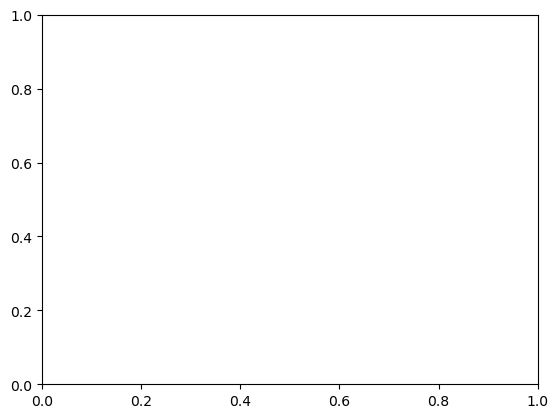

In [29]:
from sklearn.preprocessing import PolynomialFeatures

#metrics

print(f'Train R^2: {r2_score(y_test, predictions)}')

print(f'Train MAE: {mean_absolute_error(y_test, predictions)}')
#print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')

print(f'Train MAPE: {mean_absolute_percentage_error(y_test, predictions)}')
#print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

print(f'Train MSE: {mean_squared_error(y_test, predictions)}')
#print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

# errors = y_predict_test - y_test
# plt.scatter(x = y_test, y = errors, alpha=0.25)
# plt.axhline(0, color="r", linestyle="--")
# plt.xlabel('True Valuey_test')
# plt.ylabel('Residual')
# plt.title(f'Plot of residuals')
# plt.show()

# Wizualizacja wartości ze zbioru treningowego oraz testowgo
print(len(X_test), len(y_test))
#plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')

########## Wizualizacja wielomianu ##########
plt.plot(X_linespace, y_fitted, color='black', label='Prognoza')
plt.title(f'Degree {degree}')
plt.legend(loc='upper left')
plt.show()

# tworzymy puste listy gdzie umieszczane będą metryki oceniające
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

# Tworzymy X, który zostanie wykorzystany dla wizualizacji naszego modelu
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)
for degree in [1, 2, 3, 4, 5]:


    # Wizualizacja wartości ze zbioru treningowego oraz testowgo
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')

    ########## Wizualizacja wielomianu ##########
    plt.plot(X_linespace, y_fitted, color='black', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.legend(loc='upper left')
    plt.show()

    # Ocena modeli
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))